In [1]:
import simpy
import uuid
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation

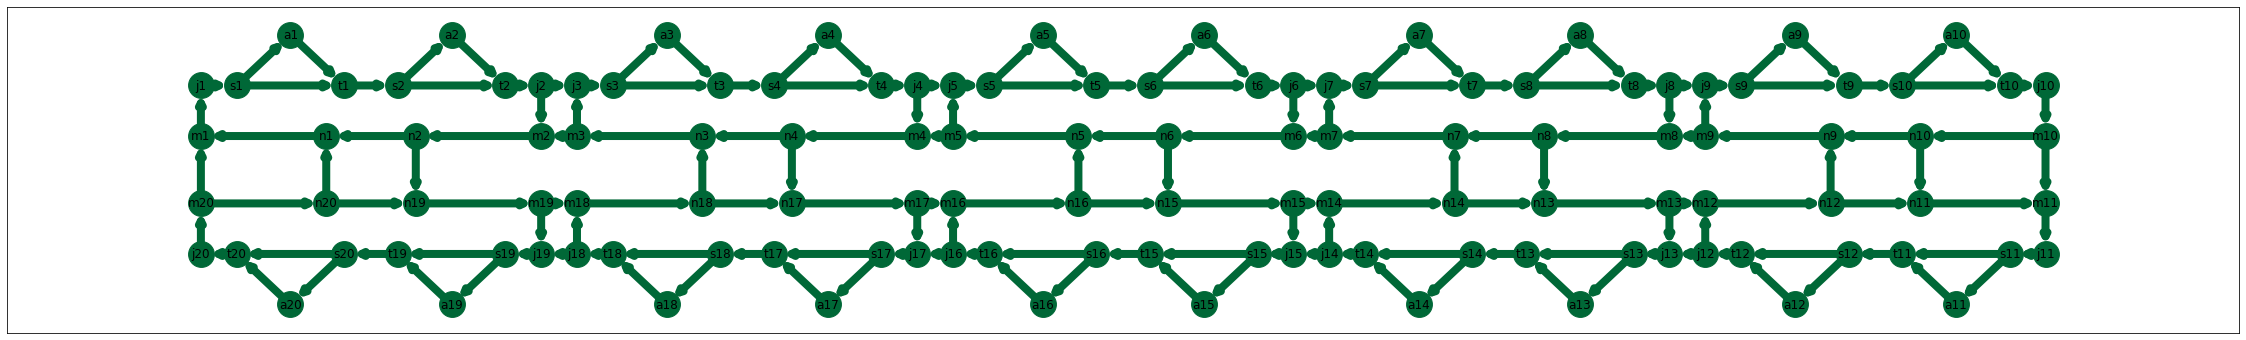

In [2]:
df = pd.DataFrame({
    's' : [
        # top half
        'j1', 's1', 's1', 'a1', 't1',
        's2', 's2', 'a2', 't2', 'j2', 'j2',
        'j3', 's3', 's3', 'a3', 't3',
        's4', 's4', 'a4', 't4', 'j4', 'j4',
        'j5', 's5', 's5', 'a5', 't5',
        's6', 's6', 'a6', 't6', 'j6', 'j6',
        'j7', 's7', 's7', 'a7', 't7',
        's8', 's8', 'a8', 't8', 'j8', 'j8',
        'j9', 's9', 's9', 'a9', 't9',
        's10', 's10', 'a10', 't10', 'j10',
        'm10', 'n10',
        'n9', 'm9', 'm9',
        'm8', 'n8',
        'n7', 'm7', 'm7',
        'm6', 'n6',
        'n5', 'm5', 'm5',
        'm4', 'n4',
        'n3', 'm3', 'm3',
        'm2', 'n2',
        'n1', 'm1',
        # bottom half
        'j11', 's11', 's11', 'a11', 't11',
        's12', 's12', 'a12', 't12', 'j12', 'j12',
        'j13', 's13', 's13', 'a13', 't13',
        's14', 's14', 'a14', 't14', 'j14', 'j14',
        'j15', 's15', 's15', 'a15', 't15',
        's16', 's16', 'a16', 't16', 'j16', 'j16',
        'j17', 's17', 's17', 'a17', 't17',
        's18', 's18', 'a18', 't18', 'j18', 'j18',
        'j19', 's19', 's19', 'a19', 't19',
        's20', 's20', 'a20', 't20', 'j20',
        'm20', 'n20',
        'n19', 'm19', 'm19',
        'm18', 'n18',
        'n17', 'm17', 'm17',
        'm16', 'n16',
        'n15', 'm15', 'm15',
        'm14', 'n14',
        'n13', 'm13', 'm13',
        'm12', 'n12',
        'n11', 'm11',
        # connecting
        'm20', 'n20', 'n2',
        'n18', 'n4',
        'n16', 'n6',
        'n14', 'n8',
        'n12', 'n10', 'm10'
    ],
    't' : [
        # top half
        's1', 't1', 'a1', 't1', 's2',
        't2', 'a2', 't2', 'j2', 'j3', 'm2',
        's3', 't3', 'a3', 't3', 's4',
        't4', 'a4', 't4', 'j4', 'j5', 'm4',
        's5', 't5', 'a5', 't5', 's6',
        't6', 'a6', 't6', 'j6', 'j7', 'm6',
        's7', 't7', 'a7', 't7', 's8',
        't8', 'a8', 't8', 'j8', 'j9', 'm8',
        's9', 't9', 'a9', 't9', 's10',
        't10', 'a10', 't10', 'j10', 'm10',
        'n10', 'n9',
        'm9', 'm8', 'j9',
        'n8', 'n7',
        'm7', 'm6', 'j7',
        'n6', 'n5',
        'm5', 'm4', 'j5',
        'n4', 'n3',
        'm3', 'm2', 'j3',
        'n2', 'n1',
        'm1', 'j1',
        # bottom half
        's11', 't11', 'a11', 't11', 's12',
        't12', 'a12', 't12', 'j12', 'j13', 'm12',
        's13', 't13', 'a13', 't13', 's14',
        't14', 'a14', 't14', 'j14', 'j15', 'm14',
        's15', 't15', 'a15', 't15', 's16',
        't16', 'a16', 't16', 'j16', 'j17', 'm16',
        's17', 't17', 'a17', 't17', 's18',
        't18', 'a18', 't18', 'j18', 'j19', 'm18',
        's19', 't19', 'a19', 't19', 's20',
        't20', 'a20', 't20', 'j20', 'm20',
        'n20', 'n19',
        'm19', 'm18', 'j19',
        'n18', 'n17',
        'm17', 'm16', 'j17',
        'n16', 'n15',
        'm15', 'm14', 'j15',
        'n14', 'n13',
        'm13', 'm12', 'j13',
        'n12', 'n11',
        'm11', 'j11',
        # connecting
        'm1', 'n1', 'n19',
        'n3', 'n17',
        'n5', 'n15',
        'n7', 'n13',
        'n9', 'n11', 'm11'
    ],
    'w' : [
        # top half
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 3.0,
        # bottom half
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 3.0,
        # connecting
        4.0, 4.0, 4.0,
        4.0, 4.0,
        4.0, 4.0,
        4.0, 4.0,
        4.0, 4.0, 4.0
    ]
})

priority_edges = {
    ('s1', 't1'),
    ('s2', 't2'),
    ('s3', 't3'),
    ('s4', 't4'),
    ('s5', 't5'),
    ('s6', 't6'),
    ('s7', 't7'),
    ('s8', 't8'),
    ('s9', 't9'),
    ('s10', 't10'),
    ('s11', 't11'),
    ('s12', 't12'),
    ('s13', 't13'),
    ('s14', 't14'),
    ('s15', 't15'),
    ('s16', 't16'),
    ('s17', 't17'),
    ('s18', 't18'),
    ('s19', 't19'),
    ('s20', 't20'),
    ('m3', 'j3'),
    ('m5', 'j5'),
    ('m7', 'j7'),
    ('m9', 'j9'),
    ('m13', 'j13'),
    ('m15', 'j15'),
    ('m17', 'j17'),
    ('m19', 'j19'),
    ('n1', 'm1'),
    ('j2', 'm2'),
    ('j4', 'm4'),
    ('j6', 'm6'),
    ('j8', 'm8'),
    ('n11', 'm11'),
    ('j12', 'm12'),
    ('j14', 'm14'),
    ('j16', 'm16'),
    ('j18', 'm18'),
    ('n2', 'n1'),
    ('n4', 'n3'),
    ('n6', 'n5'),
    ('n8', 'n7'),
    ('n10', 'n9'),
    ('n12', 'n11'),
    ('n14', 'n13'),
    ('n16', 'n15'),
    ('n18', 'n17'),
    ('n20', 'n19')
}

pos = {
    'j1' : (0, 13),
    's1' : (2, 13),
    'a1' : (5, 16),
    't1' : (8, 13),
    's2' : (11, 13),
    'a2' : (14, 16),
    't2' : (17, 13),
    'j2' : (19, 13),
    'j3' : (21, 13),
    's3' : (23, 13),
    'a3' : (26, 16),
    't3' : (29, 13),
    's4' : (32, 13),
    'a4' : (35, 16),
    't4' : (38, 13),
    'j4' : (40, 13),
    'j5' : (42, 13),
    's5' : (44, 13),
    'a5' : (47, 16),
    't5' : (50, 13),
    's6' : (53, 13),
    'a6' : (56, 16),
    't6' : (59, 13),
    'j6' : (61, 13),
    'j7' : (63, 13),
    's7' : (65, 13),
    'a7' : (68, 16),
    't7' : (71, 13),
    's8' : (74, 13),
    'a8' : (77, 16),
    't8' : (80, 13),
    'j8' : (82, 13),
    'j9' : (84, 13),
    's9' : (86, 13),
    'a9' : (89, 16),
    't9' : (92, 13),
    's10' : (95, 13),
    'a10' : (98, 16),
    't10' : (101, 13),
    'j10' : (103, 13),
    'm10' : (103, 10),
    'n10' : (96, 10),
    'n9' : (91, 10),
    'm9' : (84, 10),
    'm8' : (82, 10),
    'n8' : (75, 10),
    'n7' : (70, 10),
    'm7' : (63, 10),
    'm6' : (61, 10),
    'n6' : (54, 10),
    'n5' : (49, 10),
    'm5' : (42, 10),
    'm4' : (40, 10),
    'n4' : (33, 10),
    'n3' : (28, 10),
    'm3' : (21, 10),
    'm2' : (19, 10),
    'n2' : (12, 10),
    'n1' : (7, 10),
    'm1' : (0, 10),
    'm20' : (0, 6),
    'n20' : (7, 6),
    'n19' : (12, 6),
    'm19' : (19, 6),
    'm18' : (21, 6),
    'n18' : (28, 6),
    'n17' : (33, 6),
    'm17' : (40, 6),
    'm16' : (42, 6),
    'n16' : (49, 6),
    'n15' : (54, 6),
    'm15' : (61, 6),
    'm14' : (63, 6),
    'n14' : (70, 6),
    'n13' : (75, 6),
    'm13' : (82, 6),
    'm12' : (84, 6),
    'n12' : (91, 6),
    'n11' : (96, 6),
    'm11' : (103, 6),
    'j11' : (103, 3),
    's11' : (101, 3),
    'a11' : (98, 0),
    't11' : (95, 3),
    's12' : (92, 3),
    'a12' : (89, 0),
    't12' : (86, 3),
    'j12' : (84, 3),
    'j13' : (82, 3),
    's13' : (80, 3),
    'a13' : (77, 0),
    't13' : (74, 3),
    's14' : (71, 3),
    'a14' : (68, 0),
    't14' : (65, 3),
    'j14' : (63, 3),
    'j15' : (61, 3),
    's15' : (59, 3),
    'a15' : (56, 0),
    't15' : (53, 3),
    's16' : (50, 3),
    'a16' : (47, 0),
    't16' : (44, 3),
    'j16' : (42, 3),
    'j17' : (40, 3),
    's17' : (38, 3),
    'a17' : (35, 0),
    't17' : (32, 3),
    's18' : (29, 3),
    'a18' : (26, 0),
    't18' : (23, 3),
    'j18' : (21, 3),
    'j19' : (19, 3),
    's19' : (17, 3),
    'a19' : (14, 0),
    't19' : (11, 3),
    's20' : (8, 3),
    'a20' : (5, 0),
    't20' : (2, 3),
    'j20' : (0, 3)
}

G = nx.from_pandas_edgelist(df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
cmap = plt.get_cmap('RdYlGn_r')
fig, ax = plt.subplots(figsize=(40, 6))
nx.draw_networkx_nodes(G, pos=pos, ax=ax,
                       node_size=667,
                       node_color=[cmap(0.0)])
nx.draw_networkx_labels(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax,
                       width=8.0,
                       edge_color=cmap(0.0))
# nx.draw_networkx_edge_labels(G, pos=pos, ax=ax,
#                              edge_labels=nx.get_edge_attributes(G, 'w'))
# plt.savefig('layout.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
lot_req_rates = np.array([
    0.0, 0.0, 0.0, 116.1, 161.6, 0.0, 0.0, 85.4, 37.4, 2.7, 0.0, 85.4, 138.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 158.2, 32.1, 0.0, 87.4, 85.4, 0.0, 0.0, 40.0, 85.4, 0.0, 15.4, 123.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 89.8, 0.0, 0.0, 0.0, 158.2, 77.1, 0.0, 0.0, 55.3, 77.1, 0.0, 0.0, 284.3, 33.7, 0.0, 0.0, 20.7, 18.3, 0.0,
    84.2, 0.0, 0.0, 0.0, 116.1, 32.1, 0.0, 77.1, 81.8, 34.5, 0.0, 2.9, 266.5, 0.0, 0.0, 33.7, 19.0, 0.0, 15.4, 0.0,
    311.8, 18.2, 0.0, 158.5, 0.0, 0.0, 9.3, 298.9, 278.2, 7.7, 0.0, 373.1, 272.9, 19.7, 0.0, 31.7, 18.7, 0.0, 0.6, 65.4,
    0.0, 288.0, 220.1, 47.9, 48.3, 0.0, 378.1, 88.5, 44.4, 319.2, 387.5, 88.5, 23.4, 146.3, 31.7, 0.0, 0.0, 19.5, 31.1, 0.0,
    2.3, 70.6, 206.2, 0.0, 14.7, 568.5, 0.0, 0.0, 109.4, 0.0, 0.0, 0.0, 96.4, 219.2, 0.0, 0.0, 0.0, 17.2, 182.2, 2.6,
    72.9, 0.0, 0.0, 206.2, 471.8, 111.5, 0.0, 0.0, 109.4, 0.0, 0.0, 0.0, 315.6, 0.0, 0.0, 192.2, 0.0, 0.0, 0.0, 9.9,
    37.0, 0.2, 0.0, 97.0, 318.4, 53.5, 0.0, 35.5, 0.0, 0.0, 256.2, 256.2, 191.7, 0.0, 0.0, 17.8, 98.7, 0.0, 2.4, 17.8,
    0.0, 41.4, 111.7, 1.3, 0.0, 394.9, 256.2, 220.7, 0.0, 0.0, 0.0, 0.0, 3.5, 203.5, 17.8, 0.0, 0.0, 112.0, 15.5, 0.0,
    0.0, 72.9, 113.8, 92.4, 0.0, 583.3, 0.0, 0.0, 0.0, 109.4, 0.0, 0.0, 0.0, 315.6, 192.2, 0.0, 0.0, 0.0, 9.9, 0.0,
    72.9, 0.0, 0.0, 7.9, 670.2, 111.5, 0.0, 0.0, 15.2, 94.2, 0.0, 0.0, 315.6, 0.0, 0.0, 0.0, 22.5, 0.0, 0.0, 179.6,
    46.3, 5.1, 0.0, 0.0, 46.3, 5.1, 19.1, 62.5, 435.2, 26.4, 0.0, 62.5, 0.0, 0.0, 0.0, 370.4, 213.7, 0.0, 114.0, 370.4,
    0.0, 41.1, 0.0, 0.0, 0.0, 41.1, 43.4, 0.0, 0.0, 378.7, 62.5, 0.0, 0.0, 0.0, 370.4, 0.0, 0.0, 228.0, 256.5, 0.0,
    0.0, 0.0, 2.0, 0.0, 0.0, 5.9, 257.5, 0.0, 0.0, 0.0, 332.8, 0.0, 14.6, 32.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 1.1, 6.8, 0.0, 0.0, 30.5, 271.6, 0.0, 0.0, 288.3, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 4.6, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 332.5, 27.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.3, 0.9, 0.1, 3.5, 363.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 2.0, 0.0, 0.0, 5.9, 0.0, 0.0, 0.0, 310.4, 279.9, 0.0, 0.0, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 2.0, 5.9, 0.0, 0.0, 590.3, 0.0, 0.0, 0.0, 0.0, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
]).reshape((20, 20))

In [4]:
class AppSite(object):
    """
    Application site, i.e. tool, in the FAB.
    This corresponds to a node in the graph.
    We model an application site using the simpy.PriorityResource data type.
    We impose FOUP capacity constraints on the application.
    Only one OHT can be at an application site at a time.
    """
    def __init__(self, env, node, app_capacity, use_time, buffer_time, travel_time):
        self.node = node
        self.app = simpy.Resource(env, capacity=app_capacity)
        self.oht = simpy.PriorityResource(env, capacity=1)
        # time for a FOUP to use the application site
        self.use_time = use_time
        # time for an OHT to acquire or deposit a FOUP
        self.buffer_time = buffer_time
        # time for an OHT to travel through the application site
        self.travel_time = travel_time

In [5]:
class RailPath(object):
    """
    Path in the FAB's overhead rail system.
    This corresponds to an edge in the graph.
    We model a rail path using the simpy.Resource data type.
    We use shared resource objects to model rail path traffic flow.
    """
    def __init__(self, env, edge, rail_capacity, travel_time):
        self.edge = edge
        self.ohts = simpy.Resource(env, capacity=rail_capacity)
        # time for an OHT to travel through the rail path
        self.travel_time = travel_time

In [6]:
class FOUP(object):
    """
    Front-opening unified pod containing semiconductor wafers.
    The goal of the FAB is to process wafers as efficiently as possible.
    Our FOUP representation uses an ordered list of application demands.
    """
    def __init__(self, env, uuid, log, create_time, demands):
        self.env = env
        self.uuid = uuid
        self.log = log
        self.create_time = create_time
        self.demands = demands
        self.location = demands[0]
        # WAIT IN, TRANSFERRING, COMPLETED, APPLICATION, WAIT OUT
        self.status = 'WAIT IN'

    def at_destination(self):
        return len(self.demands) > 0 and self.demands[0] == self.location

    def can_use(self, app_site):
        return ((self.status == 'WAIT IN' or self.status == 'COMPLETED') and
                self.at_destination() and self.location == app_site.node)

    def use(self, app_site):
        assert self.can_use(app_site)
        if self.status == 'WAIT IN':
            # create FOUP
            yield self.env.timeout(self.create_time)
        self.status = 'APPLICATION'
        with app_site.app.request() as app_req:
#             self.log['text'].append('FOUP %s using AppSite %s at time %3.1f' %
#                                     (self.uuid, app_site.node, self.env.now))
            self.log['foup'].append((self.uuid, app_site.node, self.env.now))
            yield self.env.timeout(app_site.use_time)
            # complete the leading demand
            self.demands = self.demands[1:]
            self.status = 'COMPLETED' if len(self.demands) > 0 else 'WAIT OUT'

In [7]:
class OHT(object):
    """
    Overhead hoist transfer in the FAB.
    OHTs carry FOUPs from one application site to another via rail paths in the FAB.
    """
    def __init__(self, env, uuid, log, location):
        self.env = env
        self.uuid = uuid
        self.log = log
        self.location = location
        # ENTERING, PARKED, ENROUTE, ACQUIRING, DEPOSITING, REMOVED
        self.status = 'ENTERING'
        self.foup = None

    def can_take(self, source_site, rail_path, dest_site):
        return ((self.status == 'ENTERING' or self.status == 'PARKED') and
                self.location == rail_path.edge[0] == source_site.node and
                rail_path.edge[1] == dest_site.node)

    def take(self, source_site, rail_path, dest_site):
        assert self.can_take(source_site, rail_path, dest_site)
        if self.status == 'ENTERING':
            # create OHT
            self.oht_req = source_site.oht.request(priority=1)
            yield self.oht_req
        self.status = 'ENROUTE'
        with rail_path.ohts.request() as path_req:
            yield path_req
            source_site.oht.release(self.oht_req)
#             self.log['text'].append('OHT %s taking RailPath %s at time %3.1f' %
#                                     (self.uuid, rail_path.edge, self.env.now))
            self.log['oht'].append((self.uuid, rail_path.edge, self.env.now))
            yield self.env.timeout(rail_path.travel_time)
            # lower priority value is more important; to prevent deadlock
            self.oht_req = dest_site.oht.request(priority=int(rail_path.edge not in priority_edges))
            yield self.oht_req
#             self.log['text'].append('OHT %s reaching AppSite %s at time %3.1f' %
#                                     (self.uuid, dest_site.node, self.env.now))
            self.log['oht'].append((self.uuid, dest_site.node, self.env.now))
            yield self.env.timeout(dest_site.travel_time)
            # bring FOUP along with us
            if (self.foup is not None and
                    self.foup.status == 'TRANSFERRING' and
                    self.foup.location == self.location):
                self.foup.location = dest_site.node
            self.status = 'PARKED'
            self.location = dest_site.node

    def can_acquire(self, app_site, foup):
        return (self.foup is None and
                self.status == 'PARKED' and foup.status == 'COMPLETED' and
                self.location == foup.location == app_site.node)

    def acquire(self, app_site, foup):
        assert self.can_acquire(app_site, foup)
        self.status = 'ACQUIRING'
#         self.log['text'].append('OHT %s acquiring FOUP %s at AppSite %s at time %3.1f' %
#                                 (self.uuid, foup.uuid, app_site.node, self.env.now))
        yield self.env.timeout(app_site.buffer_time)
        self.foup = foup
        self.foup.status = 'TRANSFERRING'
        self.status = 'PARKED'

    def can_deposit(self, app_site):
        return (self.foup is not None and
                self.status == 'PARKED' and self.foup.status == 'TRANSFERRING' and
                self.location == self.foup.location == app_site.node)

    def deposit(self, app_site):
        assert self.can_deposit(app_site)
        self.status = 'DEPOSITING'
#         self.log['text'].append('OHT %s depositing FOUP %s at AppSite %s at time %3.1f' %
#                                 (self.uuid, self.foup.uuid, app_site.node, self.env.now))
        yield self.env.timeout(app_site.buffer_time)
        # unpair our FOUP
        self.status = 'PARKED'
        self.foup.status = 'COMPLETED'
        self.foup = None

In [8]:
class MHS(object):
    """
    Material handling system in the FAB.
    Includes AppSites, RailPaths, FOUPs, OHTs, and the graph G.
    """
    def __init__(self, app_sites, rail_paths, foups, ohts, G):
        self.app_sites = app_sites
        self.rail_paths = rail_paths
        self.foups = foups
        self.ohts = ohts
        self.G = G

In [9]:
class AMHS():
    """
    Automated material handling system.
    Defines the logic of our FAB.
    """
    def __init__(self, env, mhs):
        self.env = env
        self.mhs = mhs
        self.action = env.process(self.run())

    def run(self):
        # AMHS LOGIC HERE
        pass

In [10]:
class Simulation(object):
    """
    Runs multiple simulations from the same list of randomized jobs.
    Supports different numbers of OHTs and job request rates.
    """
    def __init__(self, G, num_ohts, job_rates, burn_in, T, random_seed=None):
        self.G = G
        self.num_ohts = num_ohts
        # randomize jobs
        if random_seed is not None:
            np.random.seed(random_seed)
        self.foup_spawn = []
        for t in range(T):
            burn_factor = min((t + 1) / (burn_in + 1), 1.0)
            time_spawn = (np.random.random(size=(20, 20)) < job_rates * burn_factor)
            for i in range(20):
                for j in range(20):
                    if time_spawn[i, j]:
                        self.foup_spawn.append((t, 'a' + str(i+1), 'a' + str(j+1)))

    def run_simulation(self, MyAMHS, num_controllers, args):
        env = simpy.Environment()
        # create rail path graph
        app_sites = {}
        for v in self.G.nodes:
            app_sites[v] = AppSite(env, v, 1, 1, 15, 1)
        rail_paths = {}
        for e in self.G.edges:
            w = int(G[e[0]][e[1]]['w'] + 1e-10)
            rail_capacity = max(1, (w + 1) // 3)
            rail_paths[e] = RailPath(env, e, rail_capacity, w)
        log = {
            'text' : [],
            'foup' : [],
            'oht' : []
        }
        foups = simpy.FilterStore(env)
        for t, i, j in self.foup_spawn:
            foups.put(FOUP(env, uuid.uuid4().int, log, t, [i, j]))
        ohts = simpy.FilterStore(env)
        for _ in range(self.num_ohts):
            ohts.put(OHT(env, uuid.uuid4().int, log, 'j1'))
        mhs = MHS(app_sites, rail_paths, foups, ohts, self.G)
        for _ in range(num_controllers):
            MyAMHS(env, mhs, args)
        env.run()
        return log

In [11]:
def performance(foup_log, start, stop):
    foup_dict = {}
    latency = 0.0
    m = 0
    n = 0
    for uuid, v, t in foup_log:
        if uuid in foup_dict:
            n += 1
            if start <= t < stop:
                m += 1
                latency += t - foup_dict[uuid]
        foup_dict[uuid] = t
    return latency / m, m * 86400 / (stop - start), m, n

In [12]:
def animate(G, pos, cmap, oht_log, filename,
            start, stop, interval=200,
            figsize=(40, 6), nodesize=667):
    nodelist = list(G.nodes)
    edgelist = list(G.edges)
    loclist = nodelist + edgelist
    # useful lookup tables for speed
    weights = [1.0] * len(nodelist) + [(G[e[0]][e[1]]['w'] + 1) // 3 for e in edgelist]
    locmap = dict(zip(loclist, range(len(loclist))))
    # initialize image
    fig, ax = plt.subplots(figsize=figsize)
    circles = [nx.draw_networkx_nodes(G, pos=pos, ax=ax,
                                      nodelist=[v],
                                      node_size=nodesize,
                                      node_color=[cmap(0.0)])
               for v in nodelist]
    nx.draw_networkx_labels(G, pos=pos, ax=ax)
    arrows = nx.draw_networkx_edges(G, pos=pos, ax=ax,
                                    edgelist=edgelist,
                                    width=8.0,
                                    edge_color=cmap(0.0))
    # prepare frame update variables
    frame_i = [0]
    traffics = [0] * len(loclist)
    graphics = circles + arrows
    ohtmap = {}
    # free up memory from unused variables
    nodelist = None
    edgelist = None
    loclist = None
    circles = None
    arrows = None
    # define the frame update rule
    def update(i):
        modified_i = set()
        uuid, l, t = oht_log[frame_i[0]]
        # update traffic
        while t <= i:
            l_i = locmap[l]
            traffics[l_i] += 1
            modified_i.add(l_i)
            if uuid in ohtmap:
                p_i = ohtmap[uuid]
                traffics[p_i] -= 1
                modified_i.add(p_i)
            ohtmap[uuid] = l_i
            frame_i[0] += 1
            uuid, l, t = oht_log[frame_i[0]]
        # change colors of modified locations
        modified = []
        for l_i in modified_i:
            graphic = graphics[l_i]
            w = weights[l_i]
            graphic.set_color(cmap(min(traffics[l_i], w) / w))
            modified.append(graphic)
        return modified
    # burn-in
    for i in range(start):
        update(i)
    # animation
    anim = animation.FuncAnimation(fig, update, frames=range(start, stop), interval=interval, blit=True)
    anim.save(filename)

In [13]:
# calculate routing protocol
iter_df = df.copy(deep=True)
# we add the node travel time to all edges
iter_df['w'] += 1.0
iter_G = nx.from_pandas_edgelist(iter_df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
sp = dict(nx.all_pairs_dijkstra_path(iter_G, weight='w'))
spl = dict(nx.all_pairs_dijkstra_path_length(iter_G, weight='w'))
# memorize dijkstra results to improve runtime and memory usage
args = (sp, spl)

In [14]:
num_ohts = 37
job_rates = lot_req_rates / 86400
burn_in = 36000
T = burn_in + 86400
sim = Simulation(G, num_ohts, job_rates, burn_in, T)
num_foups = len(sim.foup_spawn)
num_foups

26859

In [15]:
class StaticAMHS(AMHS):
    """
    Uses static graph analysis to route OHTs.
    """
    def __init__(self, env, mhs, args):
        self.sp = args[0]
        self.spl = args[1]
        super().__init__(env, mhs)

In [16]:
class GreedyAMHS(StaticAMHS):
    """
    Greedily pairs OHTs to FOUPs.
    """

    def run(self):
        req = self.mhs.foups.get()
        foup = yield req
        while True:
            app = self.mhs.app_sites[foup.location]
            if foup.at_destination():
                # case 1: our FOUP has reached its next checkpoint
                yield self.env.process(foup.use(app))
            elif foup.status == 'COMPLETED':
                # case 2: our FOUP is waiting for an OHT
                req = self.mhs.ohts.get()
                oht = yield req
                # move OHT to FOUP
                path = tuple(self.sp[oht.location][foup.location])
                for i in range(len(path) - 1):
                    s = self.mhs.app_sites[path[i]]
                    e = self.mhs.rail_paths[path[i:i+2]]
                    t = self.mhs.app_sites[path[i+1]]
                    yield self.env.process(oht.take(s, e, t))
                # acquire FOUP
                yield self.env.process(oht.acquire(app, foup))
                # move OHT to destination
                path = tuple(self.sp[oht.location][foup.demands[0]])
                for i in range(len(path) - 1):
                    s = self.mhs.app_sites[path[i]]
                    e = self.mhs.rail_paths[path[i:i+2]]
                    t = self.mhs.app_sites[path[i+1]]
                    yield self.env.process(oht.take(s, e, t))
                app = self.mhs.app_sites[foup.demands[0]]
                # deposit FOUP
                yield self.env.process(oht.deposit(app))
                self.mhs.ohts.put(oht)
            elif foup.status == 'WAIT OUT':
                break
            else:
                assert False

In [17]:
log = sim.run_simulation(GreedyAMHS, num_foups, args)
performance(log['foup'], burn_in, T)

(15288.297297297297, 15281.0, 15281, 26836)

In [18]:
# animate(G, pos, cmap, log['oht'], 'greedy_traffic.mp4', burn_in, T)

In [19]:
class PayloadAMHS(StaticAMHS):
    """
    Assigns nearest available OHTs to FOUPs.
    """

    def run(self):
        while True:
            req = None
            for foup in self.mhs.foups.items:
                if foup.at_destination():
                    # use available apps
                    req = self.mhs.foups.get(lambda x : x.uuid == foup.uuid)
                    break
            if req is not None:
                foup = yield req
                app = self.mhs.app_sites[foup.location]
                yield self.env.process(foup.use(app))
                if foup.status == 'WAIT OUT':
                    break
                self.mhs.foups.put(foup)
            else:
                req = self.mhs.foups.get()
                foup = yield req
                if len(self.mhs.ohts.items) <= 1:
                    req = self.mhs.ohts.get()
                else:
                    # identify nearest OHT
                    min_dist = np.inf
                    min_oht = None
                    for oht in self.mhs.ohts.items:
                        dist = self.spl[oht.location][foup.location]
                        if dist < min_dist:
                            min_dist = dist
                            min_oht = oht
                    req = self.mhs.ohts.get(lambda x : x.uuid == min_oht.uuid)
                oht = yield req
                # move OHT to FOUP
                path = tuple(self.sp[oht.location][foup.location])
                for i in range(len(path) - 1):
                    s = self.mhs.app_sites[path[i]]
                    e = self.mhs.rail_paths[path[i:i+2]]
                    t = self.mhs.app_sites[path[i+1]]
                    yield self.env.process(oht.take(s, e, t))
                # acquire FOUP
                app = self.mhs.app_sites[foup.location]
                yield self.env.process(oht.acquire(app, foup))
                # move OHT to destination
                path = tuple(self.sp[oht.location][foup.demands[0]])
                for i in range(len(path) - 1):
                    s = self.mhs.app_sites[path[i]]
                    e = self.mhs.rail_paths[path[i:i+2]]
                    t = self.mhs.app_sites[path[i+1]]
                    yield self.env.process(oht.take(s, e, t))
                app = self.mhs.app_sites[foup.demands[0]]
                # deposit FOUP
                yield self.env.process(oht.deposit(app))
                self.mhs.ohts.put(oht)
                self.mhs.foups.put(foup)

In [20]:
log = sim.run_simulation(PayloadAMHS, num_foups, args)
performance(log['foup'], burn_in, T)

(15235.251616273754, 15313.0, 15313, 26834)

In [21]:
# animate(G, pos, cmap, log['oht'], 'payload_traffic.mp4', burn_in, T)

In [22]:
class VehicleAMHS(StaticAMHS):
    """
    Assigns OHTs to nearest available FOUPs.
    """

    def run(self):
        while True:
            req = None
            for foup in self.mhs.foups.items:
                if foup.at_destination():
                    # use available apps
                    req = self.mhs.foups.get(lambda x : x.uuid == foup.uuid)
                    break
            if req is not None:
                foup = yield req
                app = self.mhs.app_sites[foup.location]
                yield self.env.process(foup.use(app))
                if foup.status == 'WAIT OUT':
                    break
                self.mhs.foups.put(foup)
            else:
                req = self.mhs.ohts.get()
                oht = yield req
                if len(self.mhs.foups.items) <= 1:
                    req = self.mhs.foups.get()
                else:
                    # identify nearest FOUP
                    min_dist = np.inf
                    min_foup = None
                    for foup in self.mhs.foups.items:
                        dist = self.spl[oht.location][foup.location]
                        if dist < min_dist:
                            min_dist = dist
                            min_foup = foup
                    req = self.mhs.foups.get(lambda x : x.uuid == min_foup.uuid)
                foup = yield req
                # move OHT to FOUP
                path = tuple(self.sp[oht.location][foup.location])
                for i in range(len(path) - 1):
                    s = self.mhs.app_sites[path[i]]
                    e = self.mhs.rail_paths[path[i:i+2]]
                    t = self.mhs.app_sites[path[i+1]]
                    yield self.env.process(oht.take(s, e, t))
                # acquire FOUP
                app = self.mhs.app_sites[foup.location]
                yield self.env.process(oht.acquire(app, foup))
                # move OHT to destination
                path = tuple(self.sp[oht.location][foup.demands[0]])
                for i in range(len(path) - 1):
                    s = self.mhs.app_sites[path[i]]
                    e = self.mhs.rail_paths[path[i:i+2]]
                    t = self.mhs.app_sites[path[i+1]]
                    yield self.env.process(oht.take(s, e, t))
                app = self.mhs.app_sites[foup.demands[0]]
                # deposit FOUP
                yield self.env.process(oht.deposit(app))
                self.mhs.foups.put(foup)
                self.mhs.ohts.put(oht)

In [23]:
log = sim.run_simulation(VehicleAMHS, num_foups, args)
performance(log['foup'], burn_in, T)

(633.8040757308753, 22131.0, 22131, 26828)

In [24]:
# animate(G, pos, cmap, log['oht'], 'vehicle_traffic.mp4', burn_in, T)

In [25]:
num_ohts = 43
job_rates = lot_req_rates * (1.15 / 86400)
burn_in = 36000
T = burn_in + 86400
sim = Simulation(G, num_ohts, job_rates, burn_in, T)
num_foups = len(sim.foup_spawn)
num_foups

30522

In [26]:
log = sim.run_simulation(GreedyAMHS, num_foups, args)
performance(log['foup'], burn_in, T)

(15849.672546100102, 17462.0, 17462, 30491)

In [27]:
log = sim.run_simulation(PayloadAMHS, num_foups, args)
performance(log['foup'], burn_in, T)

(15886.662931625886, 17492.0, 17492, 30493)

In [28]:
log = sim.run_simulation(VehicleAMHS, num_foups, args)
performance(log['foup'], burn_in, T)

(2176.4307288246882, 24368.0, 24368, 30484)

In [29]:
normalized_lot_req_rates = lot_req_rates[:, :, np.newaxis] / np.sum(lot_req_rates)
runtimes = []
for i in range(20):
    a_i = 'a' + str(i + 1)
    for j in range(20):
        a_j = 'a' + str(j + 1)
        runtimes.append(len(sp[a_i][a_j]))
        runtimes.append(spl[a_i][a_j])
runtimes_array = np.array(runtimes).reshape((20, 20, 2))
np.sum(normalized_lot_req_rates * runtimes_array, axis=(0, 1))

array([17.71515718, 89.26193284])

In [ ]:
j = 1
for num_ohts, lot_scale in ((37, 1.0), (39, 1.05), (41, 1.1), (43, 1.15)):
    for p_outlier in np.linspace(0.01, 0.25, 25):
        # create simulation
        job_rates = lot_req_rates * (lot_scale / 86400)
        burn_in = 36000
        T = burn_in + 86400
        sim = Simulation(G, num_ohts, job_rates, burn_in, T)
        num_foups = len(sim.foup_spawn)
        # calculate routing protocol
        iter_df = df.copy(deep=True)
        # we add the node travel time to all edges
        iter_df['w'] += 1.0
        w = {}
        for v in G.nodes:
            # make node an outlier with probability p
            if np.random.random() < p_outlier:
                # we add half the outlier travel time to all incident edges
                w[v] = np.random.randint(1, 10) / 2.0
            else:
                w[v] = 0.0
        for i in range(len(iter_df)):
            iter_df.loc[i, 'w'] += w[iter_df.loc[i, 's']] + w[iter_df.loc[i, 't']]
        iter_G = nx.from_pandas_edgelist(iter_df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
        sp = dict(nx.all_pairs_dijkstra_path(iter_G, weight='w'))
        spl = dict(nx.all_pairs_dijkstra_path_length(iter_G, weight='w'))
        # memorize dijkstra results to improve runtime and memory usage
        args = (sp, spl)
        log = sim.run_simulation(VehicleAMHS, num_foups, args)
        iter_df.to_csv('graph{}.csv'.format(j))
        with open('trail{}.pickle'.format(j), 'wb') as handle:
            pickle.dump(log, handle, protocol=pickle.HIGHEST_PROTOCOL)
        j += 1
        print(*performance(log['foup'], burn_in, T))